In [1]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from tube import *
import pickle

In [11]:
l1 = pt(-10,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])
rs = np.array([1,1,1])
Pipe1 = NLets(ls,rs)
shift1 = np.array([0,0])

11184

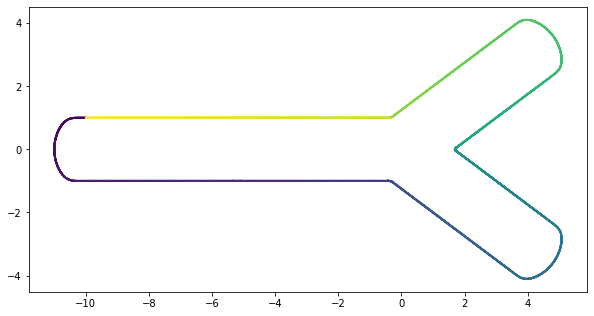

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(Pipe1.x,Pipe1.y,c=Pipe1.a,s=1)
ax.set_aspect('equal')
Pipe1.n_pts

In [24]:
def build(self):
    self.build_geometry()
    self.build_A()
    self.build_all_boundary_velocity_conditions()
    self.build_omegas(n_jobs=4)
    self.build_pressure_drops()
build(Pipe1)

----

In [37]:
ls2 = np.array([pt(5,0),-l2])
rs2 = np.array([1,1])
Pipe2 = NLets(ls2,rs2)
shift2 = 2*l2

ls3 = np.array([-l3,pt(5,0)])
rs3 = np.array([1,1])
Pipe3 = NLets(ls3,rs3)
shift3 = 2*l3

In [38]:
build(Pipe2)
build(Pipe3)

In [76]:
shift4 = shift2 + pt(10,0)
Pipe4  = NLets(np.array([pt(-5,0), pt(4,3)]), np.array([1,1]))
build(Pipe4)

shift5 = shift3 + pt(10,0)
Pipe5  = NLets(np.array([pt(-5,0), pt(4,-3)]), np.array([1,1]))
build(Pipe5)

In [78]:
Pipe6 = NLets(np.array([[-4,-3],[10,0],[-4,3]]), np.array([1,1,1]))
shift6 = np.array([26,0])

build(Pipe6)

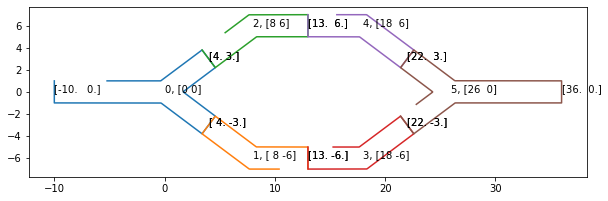

In [85]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

for a, i,j in zip(range(10), [Pipe1,Pipe2,Pipe3,Pipe4,Pipe5,Pipe6],[shift1,shift2,shift3,shift4,shift5,shift6]):
    ax.plot(*(i.boundary + j).T)
    for k in i.lets:
        ax.text(*(i.curves[k].matching_pt + j),f'{i.curves[k].matching_pt + j}')
    ax.text(*j,f'{a}, {j}')

In [95]:
def clean_A(pipe):
    pipe.A = None
    pipe.K1 = None
    pipe.K2 = None
    pipe.bdr_velocity_conditions = None
    
    
list(map(clean_A,[Pipe1,Pipe2,Pipe3,Pipe4,Pipe5,Pipe6]))

[None, None, None, None, None, None]

In [96]:
with open('dev_Pipes.pickle','wb') as f:
    pickle.dump([Pipe1,Pipe2,Pipe3,Pipe4,Pipe5,Pipe6],f,fix_imports=True,protocol=None)

In [103]:
with open('dev_Shifts.pickle','wb') as f:
    pickle.dump([shift1,shift2,shift3,shift4,shift5,shift6],f,fix_imports=True,protocol=None)

In [97]:
pipes = pickle.load(open('dev_Pipes.pickle','rb'))